In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
from rubin_calib_etc import RubinCalibETC

In [2]:
config_file = os.path.join('config','cbp_calib_etc.yaml')

In [3]:
with open(config_file) as f:
    config = yaml.safe_load(f)
    print(config)

{'light_source': 'laser', 'calib_type': 'CBP', 'snr': 300, 'laser_power_file': 'PGD151_NT242.txt', 'laser_decrease_expected': 0, 'sphere_diameter': 6, 'use_fiber': True, 'fiber_length': 8, 'fiber_coupling': 0.8, 'fiber_type': 'WFNS', 'exit_port_diameter': 2.5, 'port_diameters': [2.5, 1, 1], 'sphere_reflectance': 0.985, 'distance_to_mask': 3, 'pinhole_size': 0.00015, 'f_num_cbp': 2.63, 'f_cbp': 0.635, 'cbp_transmission': 0.5, 'f_lsst': 10.3, 'pixel_size': 1e-05, 'm1': 'Protected-Ag', 'm2': 'Protected-Ag', 'm3': 'Protected-Ag', 'detector_file': 'detector_e2vPrototype.dat', 'corrector_lenses': ['lens1.dat', 'lens2.dat', 'lens3.dat'], 'total_number_of_pixels': 3200000000, 'cam_readout': 2, 'min_exptime': 13, 'electrometer_readout': 0, 'spectrograph_readout': 0}


In [4]:
ETC = RubinCalibETC(config_file)

In [19]:
pinholes = [0.000005, 0.00001, 0.000025, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003]
data = {'u':0,'g':0,'r':0,'i':0,'z':0,'y4':0}
data2 = {'u':[],'g':[],'r':[],'i':[],'z':[],'y4':[]}
for pinhole in pinholes:
    ETC.pinhole_size = pinhole
    ETC.get_total_exptime()
    for _filter, a in ETC.photons_per_pixel.items():
        x = a[np.where(a>0)]
        y = (a*ETC.spot_total_pixels)[np.where(a>0)]
        data[_filter] = np.mean(x)
        data2[_filter].append(np.mean(y))

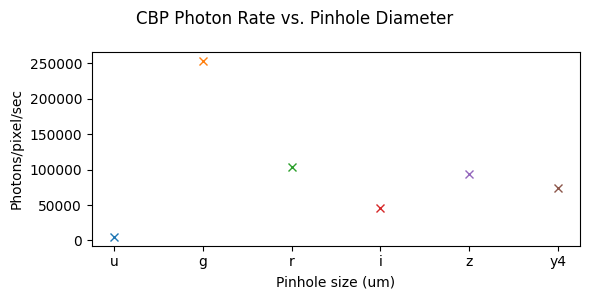

In [23]:
fig, (ax1) = plt.subplots(1, figsize=(6,3), sharex=True)
for _filter, d in data.items():
    ax1.plot(_filter, d,'x')

#ax1.legend(loc='upper center', ncols=len(data))
plt.xlabel('Pinhole size (um)')
ax1.set_ylabel('Photons/pixel/sec')
fig.suptitle('CBP Photon Rate vs. Pinhole Diameter')
fig.tight_layout()

In [24]:
data

{'u': 4986.939229543512,
 'g': 253573.1588912327,
 'r': 103405.55295363048,
 'i': 45307.807384391635,
 'z': 94469.93552670444,
 'y4': 74643.21457403478}

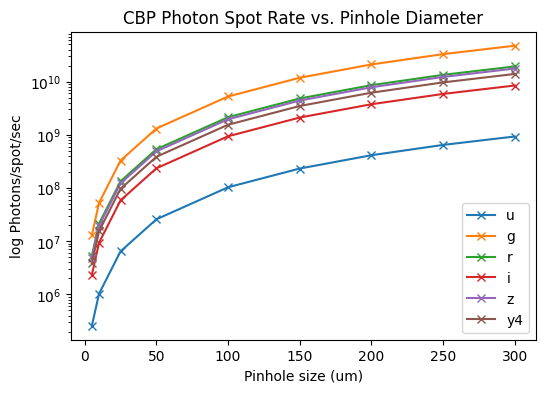

In [27]:
plt.figure(figsize=(6,4))
for _filter, d in data2.items():
    plt.semilogy(np.array(pinholes)*1e6, d, 'x-',label=_filter)
plt.legend()
plt.xlabel('Pinhole size (um)')
plt.ylabel('log Photons/spot/sec')
plt.title('CBP Photon Spot Rate vs. Pinhole Diameter')
plt.savefig('cbp_photon_spot_rate.png')

In [29]:
ETC = RubinCalibETC(config_file)

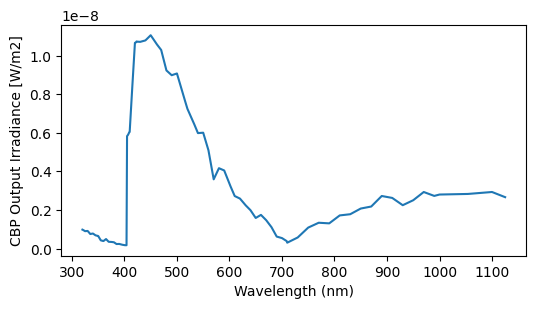

In [9]:
ETC.plot_cbp_throughput()

In [11]:
ETC.cbp_system_throughput, ETC.Ls, ETC.mask_efficiency, ETC.cbp_efficiency

(2.8047614705427663e-08,
 60.1550327906836,
 8.21250366214906e-09,
 0.05677385558541025)

In [14]:
ETC.sphere_reflectance, ETC.f, ETC.sphere_area, ETC.port_area

(0.985, 0.05729166666666668, 0.07296587699003966, 0.0041803367025543565)

Results for pinhole: 150.0 um


2.8047614705427663e-08

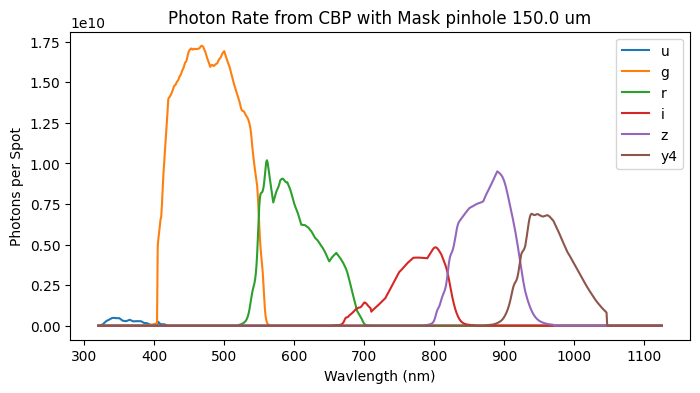

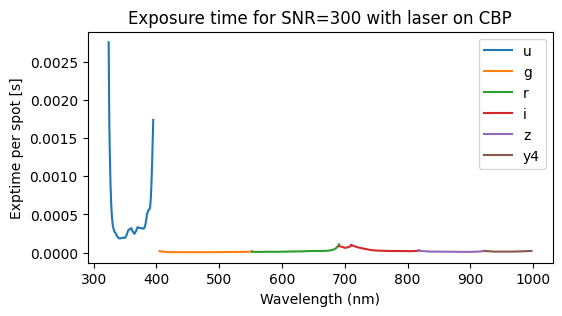

In [30]:
print(f'Results for pinhole: {ETC.pinhole_size * 10e5} um')
ETC.get_total_exptime()
ETC.plot_photon_rate()
plt.title(f'Photon Rate from CBP with Mask pinhole {ETC.pinhole_size*10e5} um')
ETC.plot_exptime(with_overheads=False)
ETC.cbp_system_throughput

Results for pinhole: 5.0 um


3.116401633936408e-11

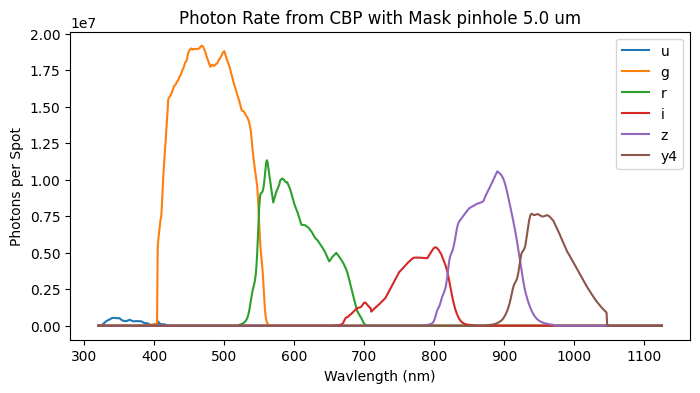

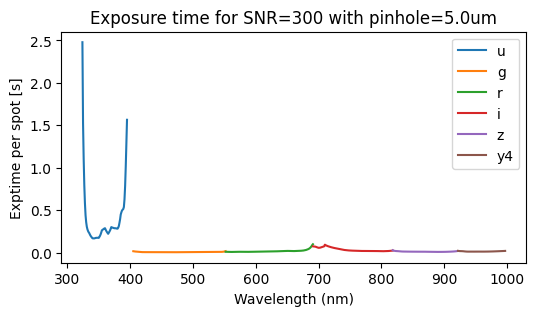

In [34]:
ETC.pinhole_size = 0.000005
print(f'Results for pinhole: {ETC.pinhole_size * 10e5} um')
ETC.get_total_exptime()
ETC.plot_photon_rate()
plt.title(f'Photon Rate from CBP with Mask pinhole {ETC.pinhole_size*10e5} um')
ETC.plot_exptime(with_overheads=False)
plt.title(f'Exposure time for SNR=300 with pinhole={ETC.pinhole_size*10e5}um')
ETC.cbp_system_throughput

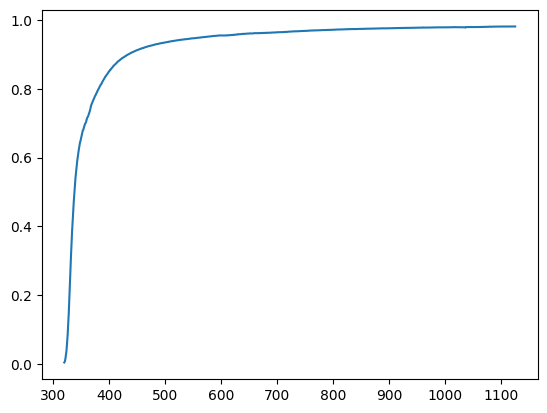

In [18]:
plt.plot(ETC.rubin_wavelength, ETC.telescope_reflectance)